Importing necessary libraries

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns  # For correlation heatmap
import pandas as pd
path = "Q3_complex_linear_regression_dataset.csv"

Exploratory Data Analysis (EDA)

         X1  X2 X3          y
0  5.488135   0  B  15.131003
1  7.151894   0  C  22.754254
2  6.027634   1  A  18.714551
3  5.448832   1  A  19.512664
4  4.236548   1  B  15.154276
         X3
count   300
unique    3
top       A
freq    105
               X1          X2           y
count  300.000000  300.000000  300.000000
mean     5.035025    0.516667   16.201970
std      2.904740    0.500557    9.217629
min      0.046955    0.000000   -3.924092
25%      2.476713    0.000000    8.048621
50%      5.225482    1.000000   16.214571
75%      7.303055    1.000000   23.707521
max      9.988470    1.000000   34.671262


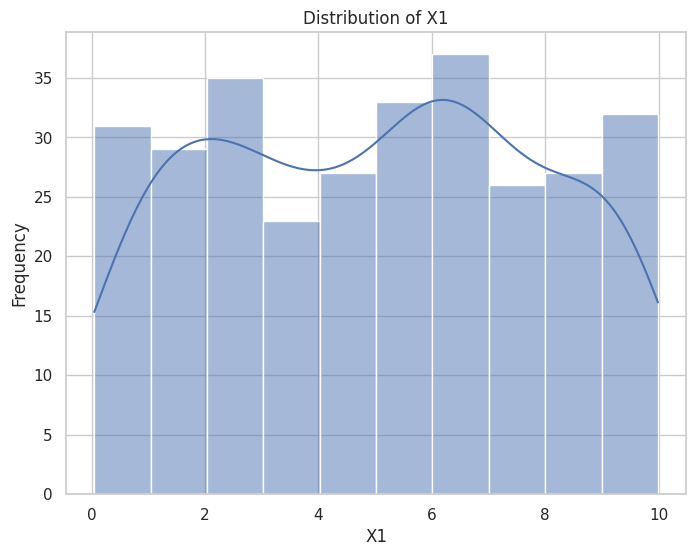

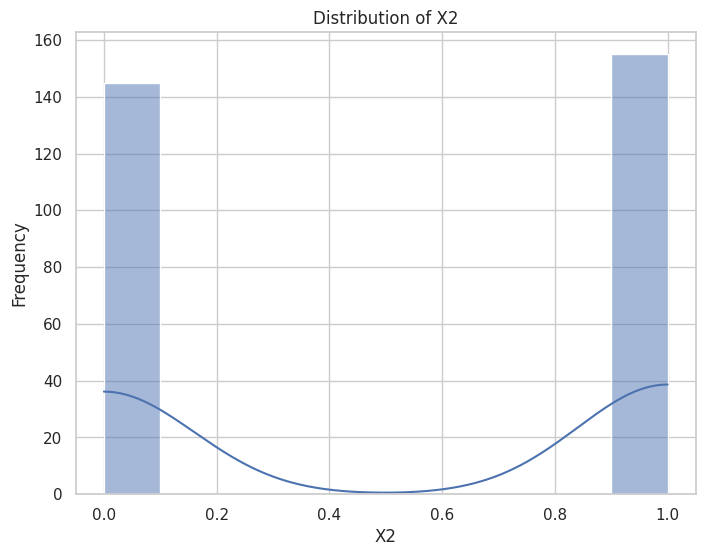

No. of outliers in output: 0
No. of outliers in input: 0


In [ ]:
df = pd.read_csv(path)
print(df.head())
print(df.describe(include='object'))
print(df.describe())

# Visualize the distribution of X1
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.histplot(df['X1'], kde=True)
plt.title('Distribution of X1')
plt.xlabel('X1')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of X2
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.histplot(df['X2'], kde=True)
plt.title('Distribution of X2')
plt.xlabel('X2')
plt.ylabel('Frequency')
plt.show()

# Define a function to calculate outliers using IQR method
def find_outliers_iqr(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers

# Find outliers for both numerical columns
outliers_y = find_outliers_iqr(df['y'])
outliers_x = find_outliers_iqr(df['X1'])

# Count the number of outliers
num_outliers_y = len(outliers_y)
num_outliers_x = len(outliers_x)

# Print the number of outliers
print(f'No. of outliers in output: {num_outliers_y}')
print(f'No. of outliers in input: {num_outliers_x}')


In [ ]:
#To divide data into numerical and categorical columns
numerical_columns = ['X1', 'X2']   #Can treat X2 as a numerical column
categorical_columns = ['X3']

# One hot encoding of categorical columns
X_categorical = df[categorical_columns]
X_categorical = pd.get_dummies(X_categorical, columns=categorical_columns)

# To convert into numpy array
X_numerical = df[numerical_columns].to_numpy()
Y=df['y'].to_numpy()

#To normalise the numerical columns
X_min=X_numerical.min()
X_max=X_numerical.max()
X_norm=(X_numerical-X_min)/(X_max-X_min)

#Combine features (Needed only if you include X3 in the model)
#X = np.concatenate((X_norm, X_categorical.values), axis=1)

Correlation heatmap

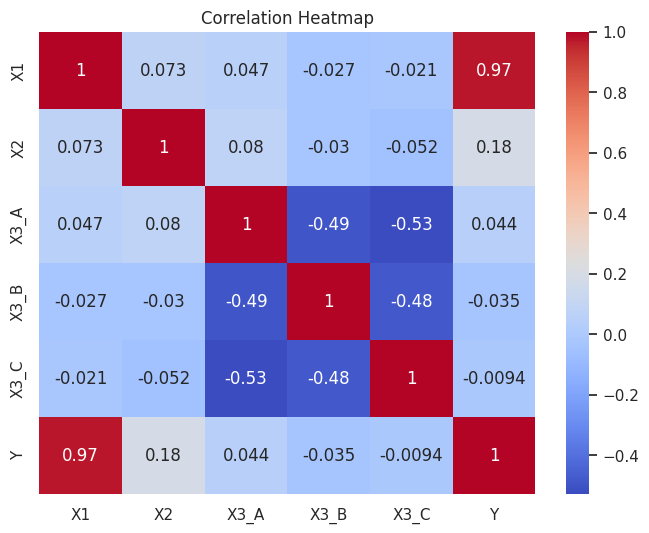

In [ ]:
combined = np.column_stack((X, Y))
correlation_matrix = np.corrcoef(combined, rowvar=False)
plt.figure(figsize=(8, 6))
custom_labels = ['X1', 'X2', 'X3_A', 'X3_B', 'X3_C', 'Y']
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=custom_labels, yticklabels=custom_labels)
plt.title('Correlation Heatmap')
plt.show()

Splitting data into training and testing set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) if you include X3 in the model

Converting numpy arrays into pytorch tensors

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)
n_samples, n_features = X_train.shape

Define the model

In [ ]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

Defining Loss Function

In [ ]:
learning_rate=0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Running Linear Regression

In [ ]:
num_epochs = 500
loss_plot = []
for epoch in range(num_epochs):
    model.train()  # To set the model in training mode
    train_loss = 0.0

    # Training loop on the training set
    for i in range(len(X_train)):
        inputs = X_train[i]
        target = Y_train[i]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Average training loss for the epoch
    train_loss /= len(X_train)
    loss_plot.append(train_loss)

    # Print the loss for each epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss}')


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/500], Train Loss: 3.7482133832849893
Epoch [2/500], Train Loss: 3.7482131261794467
Epoch [3/500], Train Loss: 3.748213129678091
Epoch [4/500], Train Loss: 3.7482137905210644
Epoch [5/500], Train Loss: 3.7482134714873
Epoch [6/500], Train Loss: 3.748213531868047
Epoch [7/500], Train Loss: 3.7482134510433145
Epoch [8/500], Train Loss: 3.74821335762875
Epoch [9/500], Train Loss: 3.74821330728931
Epoch [10/500], Train Loss: 3.748213473222859
Epoch [11/500], Train Loss: 3.748212732169486
Epoch [12/500], Train Loss: 3.7482127348683814
Epoch [13/500], Train Loss: 3.7482129502333312
Epoch [14/500], Train Loss: 3.748213092271665
Epoch [15/500], Train Loss: 3.748213302393621
Epoch [16/500], Train Loss: 3.748213082732521
Epoch [17/500], Train Loss: 3.74821265437713
Epoch [18/500], Train Loss: 3.7482129588377573
Epoch [19/500], Train Loss: 3.748212645944295
Epoch [20/500], Train Loss: 3.748213010260952
Epoch [21/500], Train Loss: 3.748212602988133
Epoch [22/500], Train Loss: 3.74821272133

Plotting the training loss vs number of epochs

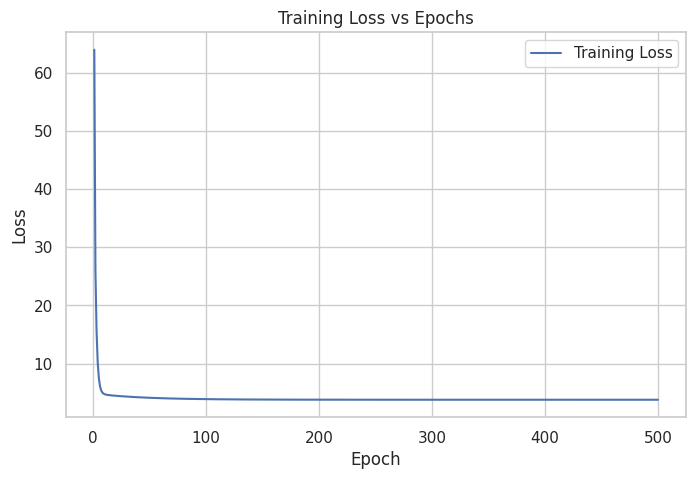

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), loss_plot, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

Plotting the target value and predicted value for training set

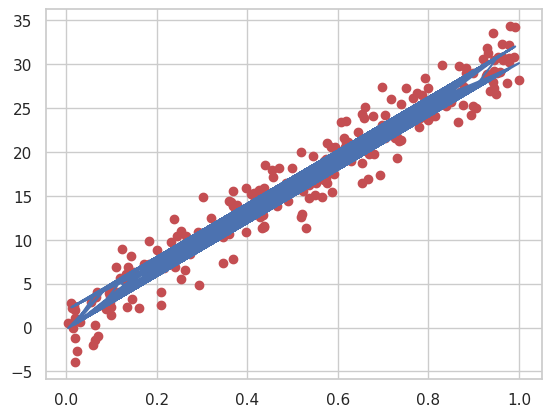

In [ ]:
Predicted = model(X_train).detach()
plt.plot(X_train[:,0],Y_train,'ro')
plt.plot(X_train[:,0], Predicted,'b')
plt.show()

Calculating the test loss

In [ ]:
model.eval()  # To set the model in evaluation mode

with torch.no_grad():
    Y_pred = model(X_test)

# Calculate MSE, MAE, and R-squared losses
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 4.431305408477783
Mean Absolute Error (MAE): 1.728131890296936
R-squared (R²): 0.9437297197432672


Plotting the target value and predicted value for test set

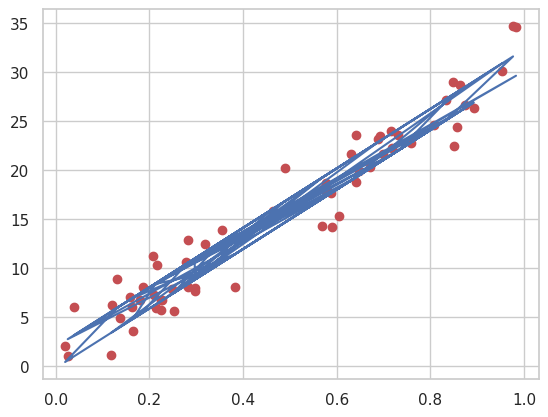

In [ ]:
Predicted = model(X_test).detach()
plt.plot(X_test[:,0],Y_test,'ro')
plt.plot(X_test[:,0], Predicted,'b')
plt.show()

To analyse the model parameters

In [ ]:
# To access the model's state_dict
model_state_dict = model.state_dict()

# To print the parameter names and their corresponding values
for param_name, param_value in model_state_dict.items():
    print(f'Parameter Name: {param_name}')
    print(f'Parameter Value:\n{param_value}\n')

Parameter Name: weight
Parameter Value:
tensor([[30.3176, 21.5436, -0.0594,  0.0418,  0.3943]])

Parameter Name: bias
Parameter Value:
tensor([-0.3266])



Saving the model

In [ ]:
model_path = 'Model_Q3_without_X3' #Note that this can become Q3_with_X3 if we make the necessary changes and use X3 in the model
torch.save(model.state_dict(), model_path)

Loading the new input dataset to make predictions

In [ ]:
path2 = "Predictions.csv"
df_test = pd.read_csv(path2)
df_test.head()

,X1,X2,X3
0,7.46,0,C
1,8.42,1,B
2,3.57,0,A
3,2.29,0,A
4,9.18,1,B


In [ ]:
model_test = nn.Linear(2,1)  # Create an instance of the model

# To load the model's state dictionary
model_test.load_state_dict(torch.load('Q3_without_X3'))
model_state_dict = model_test.state_dict()

# To print the parameter names and their corresponding values for sanity check
for param_name, param_value in model_state_dict.items():
    print(f'Parameter Name: {param_name}')
    print(f'Parameter Value:\n{param_value}\n')

Parameter Name: weight
Parameter Value:
tensor([[30.3256, 21.5794]])

Parameter Name: bias
Parameter Value:
tensor([-0.2091])



In [ ]:
input_columns = ['X1', 'X2']
X_pred = df_test[input_columns].to_numpy()  # Convert to numpy
X_pred_norm = (X_pred-X_min)/(X_max-X_min)  # Normalise the data
X_pred_tensor = torch.tensor(X_pred_norm, dtype=torch.float32)  #Convert to Pytorch tensor
Predictions = model_test(X_pred_tensor)
Predictions

tensor([[22.4399],
        [27.5150],
        [10.6296],
        [ 6.7435],
        [29.8224]], grad_fn=<AddmmBackward0>)